In [1]:
%matplotlib inline
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import numpy as np
import matplotlib.pyplot as plt



    *******  Outcome *********************
    > To do the get request from URL
    > First query tested a single date
    > Second query returns a full year
    > Final pipeline of cleanong retuns a list whioch is easy to work with
    
    ******* To Do ***********************
    > No location in the returned content. Check the doc on how to inclide location info
    > Use a for loop to return values for all year. Only a single year was tested year.
    > From the lists make a dictionsy and then a data frame to begin analysis
    > Concatenate data frame to begin analysis
    


In [2]:
# this variable holds the url 
# Note that it queries for a partivcular patent data
urlHome = 'http://www.patentsview.org/api/patents/query?q={"_gte":{"patent_date":"2007-01-04"}}' 

In [3]:
# use beautiful soup to do aget request 
home = requests.get(urlHome)
# Store the contents of request in another variable
homeSoup = BeautifulSoup(home.content,'lxml')


In [4]:
homeSoup  # view the  scrapped  content 

<html><body><p>{"patents":[{"patent_id":"7159246","patent_number":"7159246","patent_title":"Glove with high tactile portion"},{"patent_id":"7159247","patent_number":"7159247","patent_title":"Cap having a flexible headband"},{"patent_id":"7159248","patent_number":"7159248","patent_title":"Head covering with attached whistle"},{"patent_id":"7159249","patent_number":"7159249","patent_title":"Self-balancing, load-distributing helmet structure"},{"patent_id":"7159250","patent_number":"7159250","patent_title":"Swimming goggles"},{"patent_id":"7159251","patent_number":"7159251","patent_title":"Water saver flush system"},{"patent_id":"7159252","patent_number":"7159252","patent_title":"Folding sink"},{"patent_id":"7159253","patent_number":"7159253","patent_title":"Modular headboard and method of assembly"},{"patent_id":"7159254","patent_number":"7159254","patent_title":"Motorized hammock swinging assembly"},{"patent_id":"7159255","patent_number":"7159255","patent_title":"Support base for a bed 

In [49]:
# This is the second query 
# use the url to query for a single year
# Note the specification of the query data
urlHome2 = 'http://www.patentsview.org/api/patents/query? \
            q={"_and":[{"_gte":{"patent_date":"1992-01-01"}},{"_lte":{"patent_date":"1992-12-31"}}]}'

In [32]:
## Do a request and copy content in a variable
home2 = requests.get(urlHome2)
homeSoup2 = BeautifulSoup(home2.content,'lxml')


In [33]:
homeSoup2.text # view the content

u'{"patents":[{"patent_id":"5077836","patent_number":"5077836","patent_title":"Headgear"},{"patent_id":"5077837","patent_number":"5077837","patent_title":"Knee or elbow protector"},{"patent_id":"5077838","patent_number":"5077838","patent_title":"Convertible outerwear garment"},{"patent_id":"5077839","patent_number":"5077839","patent_title":"Helmet chain strap buckle"},{"patent_id":"5077840","patent_number":"5077840","patent_title":"Channelling apparatus for a toilet"},{"patent_id":"5077841","patent_number":"5077841","patent_title":"Hydromassaging apparatus for use in a bathtub"},{"patent_id":"5077842","patent_number":"5077842","patent_title":"Shower apparatus"},{"patent_id":"5077843","patent_number":"5077843","patent_title":"Hospital bed and assemblies of hospital care apparatus"},{"patent_id":"5077844","patent_number":"5077844","patent_title":"Mechanical apparatus for lifting and moving humans"},{"patent_id":"5077845","patent_number":"5077845","patent_title":"Bed with built-in commode

In [34]:
import re # import regular expression library. 
          # use regular expression to strip what was downloaded from beautiful soup

In [65]:
home = re.findall("\{(.*?)\}", homeSoup2.text)    # strip the content collected. Remove everything outside the 
                                                    # curly bracket
                                                    # importantly it removes the count and total patent count in the
                                                    # last line

In [67]:
home2  =  homeSoup2.text    # this returns a list 
                            # we can remove elements unwanted from the lisy
                            # we can keep this for the future

In [81]:
# This removes the {"patents" in the in the forst element of the list
if home[0].startswith('{'):
    home[0] = url[12:]

In [83]:
home # this is a list. Each item on the list can then be reprocessed. And put in data frame for each year
    

[u'"patents":[{"patent_id":"5077836","patent_number":"5077836","patent_title":"Headgear"',
 u'"patent_id":"5077837","patent_number":"5077837","patent_title":"Knee or elbow protector"',
 u'"patent_id":"5077838","patent_number":"5077838","patent_title":"Convertible outerwear garment"',
 u'"patent_id":"5077839","patent_number":"5077839","patent_title":"Helmet chain strap buckle"',
 u'"patent_id":"5077840","patent_number":"5077840","patent_title":"Channelling apparatus for a toilet"',
 u'"patent_id":"5077841","patent_number":"5077841","patent_title":"Hydromassaging apparatus for use in a bathtub"',
 u'"patent_id":"5077842","patent_number":"5077842","patent_title":"Shower apparatus"',
 u'"patent_id":"5077843","patent_number":"5077843","patent_title":"Hospital bed and assemblies of hospital care apparatus"',
 u'"patent_id":"5077844","patent_number":"5077844","patent_title":"Mechanical apparatus for lifting and moving humans"',
 u'"patent_id":"5077845","patent_number":"5077845","patent_title"

#  Data sets
http://www.nber.org/patents/

  > Apart from scrapped data sets we will also be using data sets from http://www.nber.org/patents/ . Below we provide preprocessing of this data set

In [2]:
# import inventor record
inventors_record = pd.read_csv("ainventor.txt", low_memory=False)

In [3]:
inventors_record.head() # see inventors record 

,PATENT,LASTNAM,FIRSTNAM,MIDNAM,MODIFNAM,STREET,CITY,POSTATE,COUNTRY,ZIP,INVSEQ
0,3858241,Durand,Philip,E.,NaN,NaN,Hudson,MA,US,NaN,1
1,3858241,Norris,Lonnie,H.,NaN,NaN,Milford,MA,US,NaN,2
2,3858242,Gooding,Elwyn,R.,NaN,120 Darwin Rd.,Pinckney,MI,US,48169,1
3,3858243,Pierron,Claude,Raymond,NaN,NaN,Epinal,NaN,FR,NaN,1
4,3858243,Jenny,Jean,Paul,NaN,NaN,Decines,NaN,FR,NaN,2


In [4]:
inventors_record.describe() # summary of data # INVSEQ= inventor sequence number

,PATENT,INVSEQ
count,4.301229e+06,4.301229e+06
mean,4.997507e+06,2.008670e+00
std,6.162319e+05,1.486188e+00
min,3.858241e+06,1.000000e+00
25%,4.475992e+06,1.000000e+00
50%,5.030897e+06,2.000000e+00
75%,5.533738e+06,2.000000e+00
max,6.009554e+06,3.400000e+01


In [5]:
inventors_record.shape # check size of data set

(4301229, 11)

In [6]:
inventors_record.columns # check the columns of data 

Index([u'PATENT', u'LASTNAM', u'FIRSTNAM', u'MIDNAM', u'MODIFNAM', u'STREET',
       u'CITY', u'POSTATE', u'COUNTRY', u'ZIP', u'INVSEQ'],
      dtype='object')

In [7]:
print ("The number of columns in data set ", inventors_record.columns.shape) #

('The number of columns in data set ', (11,))


In [8]:
# check columns with null values
for i in inventors_record.columns:
    print (i) 
    i = str(i)
    print ("Null status: ", inventors_record[i].isnull().values.any())
    

PATENT
('Null status: ', False)
LASTNAM
('Null status: ', False)
FIRSTNAM
('Null status: ', True)
MIDNAM
('Null status: ', True)
MODIFNAM
('Null status: ', True)
STREET
('Null status: ', True)
CITY
('Null status: ', True)
POSTATE
('Null status: ', True)
COUNTRY
('Null status: ', False)
ZIP
('Null status: ', True)
INVSEQ
('Null status: ', False)


 <p> <b> From above there are four columns without null values </b> </p>

In [9]:
count =0 
for i in inventors_record.columns:
    i = str(i)
    if inventors_record[i].isnull().values.any() == False:
        print (i)
        count += 1;
print ("Total coulumns without Nan", count)
        
    

PATENT
LASTNAM
COUNTRY
INVSEQ
('Total coulumns without Nan', 4)


In [10]:
patent_data = pd.read_csv("apat63_99.txt", low_memory=False)

In [11]:
patent_data.columns

Index([u'PATENT', u'GYEAR', u'GDATE', u'APPYEAR', u'COUNTRY', u'POSTATE',
       u'ASSIGNEE', u'ASSCODE', u'CLAIMS', u'NCLASS', u'CAT', u'SUBCAT',
       u'CMADE', u'CRECEIVE', u'RATIOCIT', u'GENERAL', u'ORIGINAL',
       u'FWDAPLAG', u'BCKGTLAG', u'SELFCTUB', u'SELFCTLB', u'SECDUPBD',
       u'SECDLWBD'],
      dtype='object')

In [12]:
patent_data.head()

,PATENT,GYEAR,GDATE,APPYEAR,COUNTRY,POSTATE,ASSIGNEE,ASSCODE,CLAIMS,NCLASS,...,CRECEIVE,RATIOCIT,GENERAL,ORIGINAL,FWDAPLAG,BCKGTLAG,SELFCTUB,SELFCTLB,SECDUPBD,SECDLWBD
0,3070801,1963,1096,NaN,BE,NaN,NaN,1,NaN,269,...,1,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3070802,1963,1096,NaN,US,TX,NaN,1,NaN,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3070803,1963,1096,NaN,US,IL,NaN,1,NaN,2,...,9,NaN,0.3704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3070804,1963,1096,NaN,US,OH,NaN,1,NaN,2,...,3,NaN,0.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3070805,1963,1096,NaN,US,CA,NaN,1,NaN,2,...,1,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
patent_data.shape # shape of data set

(2923922, 23)

In [14]:
print ("The number of columns in data set ", patent_data.columns.shape) #

('The number of columns in data set ', (23,))


In [15]:
patent_data.columns

Index([u'PATENT', u'GYEAR', u'GDATE', u'APPYEAR', u'COUNTRY', u'POSTATE',
       u'ASSIGNEE', u'ASSCODE', u'CLAIMS', u'NCLASS', u'CAT', u'SUBCAT',
       u'CMADE', u'CRECEIVE', u'RATIOCIT', u'GENERAL', u'ORIGINAL',
       u'FWDAPLAG', u'BCKGTLAG', u'SELFCTUB', u'SELFCTLB', u'SECDUPBD',
       u'SECDLWBD'],
      dtype='object')

In [16]:
count =0 
for i in patent_data.columns:
    i = str(i)
    if patent_data[i].isnull().values.any() == False:
        print (i)
        count += 1;
print ("Total coulumns without Nan", count)
        
    

PATENT
GYEAR
GDATE
COUNTRY
ASSCODE
NCLASS
CAT
SUBCAT
CRECEIVE
('Total coulumns without Nan', 9)


In [17]:
count =0 
for i in patent_data.columns:
    i = str(i)
    if patent_data[i].isnull().values.any() == True:
        print (i)
        count += 1;
print ("Coulumns with Nan", count)
        
    

APPYEAR
POSTATE
ASSIGNEE
CLAIMS
CMADE
RATIOCIT
GENERAL
ORIGINAL
FWDAPLAG
BCKGTLAG
SELFCTUB
SELFCTLB
SECDUPBD
SECDLWBD
('Coulumns with Nan', 14)


In [18]:
# Explanation of patent parameters -- This was written to enable understanding of 
# the data parameters
patent_data_column_meaning = pd.read_csv("patent_column_name_explanation.txt")

In [19]:
patent_data_column_meaning

,Variable Name,Variable type,Characters,Contents
0,patent,numeric,7,Patent Number
1,gyear,numeric,12,Grant Year
2,gdate,numeric,12,Grant Date
3,appyear,numeric,12,Application Year
4,country,character,3,Country of First Inventor
5,postate,charecter,3,State of First Inventor (if US)
6,assignee,numeric,12,Assignee Identifier (missing 1963-1967)
7,asscode,numeric,12,Assignee Type (see below)
8,claims,numeric,12,number of Claims
9,nclass,numeric,12,Main Patent Class (3 digit)


<p><b>For more on the explanation of these parameters please read the paper:</b></p>
http://www.nber.org/patents/pat63_99.txt

## Joining The Tables Before Analysis

From the inventors record we can the names of inventor to the patent_data.

In [20]:
# Collect from inventors data set coluns that are interesting to us
inventors_record_reduced = inventors_record[['PATENT' ,'LASTNAM' ,'FIRSTNAM', 'MIDNAM','MODIFNAM']]

In [21]:
# Merge the data seton patent 
merged_data_left = pd.merge(inventors_record_reduced, patent_data, on="PATENT",how="left")

In [22]:
merged_data_left.shape # checkt the shape of data set

(4301229, 27)

In [23]:
count =0 
for i in merged_data_left.columns:
    i = str(i)
    if merged_data_left[i].isnull().values.any() == False:
        print (i)
        count += 1;
print ("Coulumns without Nan", count)
        
   

PATENT
LASTNAM
GYEAR
GDATE
COUNTRY
ASSCODE
NCLASS
CAT
SUBCAT
CMADE
CRECEIVE
('Coulumns without Nan', 11)


In [24]:
count =0 
for i in merged_data_left.columns:
    i = str(i)
    if merged_data_left[i].isnull().values.any() == True:
        print (i)
        count += 1;
print ("Coulumns with Nan", count)
        
   

FIRSTNAM
MIDNAM
MODIFNAM
APPYEAR
POSTATE
ASSIGNEE
CLAIMS
RATIOCIT
GENERAL
ORIGINAL
FWDAPLAG
BCKGTLAG
SELFCTUB
SELFCTLB
SECDUPBD
SECDLWBD
('Coulumns with Nan', 16)


In [25]:
merged_data_left.head()

,PATENT,LASTNAM,FIRSTNAM,MIDNAM,MODIFNAM,GYEAR,GDATE,APPYEAR,COUNTRY,POSTATE,...,CRECEIVE,RATIOCIT,GENERAL,ORIGINAL,FWDAPLAG,BCKGTLAG,SELFCTUB,SELFCTLB,SECDUPBD,SECDLWBD
0,3858241,Durand,Philip,E.,NaN,1975,5485,1974.0,US,MA,...,0,0.6000,NaN,0.0000,NaN,27.0000,1.0,0.2,NaN,NaN
1,3858241,Norris,Lonnie,H.,NaN,1975,5485,1974.0,US,MA,...,0,0.6000,NaN,0.0000,NaN,27.0000,1.0,0.2,NaN,NaN
2,3858242,Gooding,Elwyn,R.,NaN,1975,5485,1973.0,US,MI,...,12,0.7500,0.1528,0.0000,11.0833,16.2500,NaN,NaN,NaN,NaN
3,3858243,Pierron,Claude,Raymond,NaN,1975,5485,1973.0,FR,NaN,...,2,0.8571,0.0000,0.2778,6.0000,8.1429,0.0,0.0,0.0,0.0
4,3858243,Jenny,Jean,Paul,NaN,1975,5485,1973.0,FR,NaN,...,2,0.8571,0.0000,0.2778,6.0000,8.1429,0.0,0.0,0.0,0.0


In [26]:
# store the data set using pickle
import pickle
merged_data_left.to_pickle('dataset.pkl') 

In [27]:
merged_data_left  = pd.read_pickle('dataset.pkl')  #to read pickle

In [29]:
countries_patent = pd.crosstab(merged_data_left["COUNTRY"], columns = "count" )

In [59]:
countries_patent.describe()

col_0,count
count,1.540000e+02
mean,2.793006e+04
std,1.951097e+05
min,1.000000e+00
25%,6.000000e+00
50%,2.750000e+01
75%,5.935000e+02
max,2.159229e+06


In [65]:
2.793006e+04

27930.06

In [67]:
print "Number of patents per country"
countries_patent[1:20]

Number of patents per country


col_0,count
COUNTRY,
AE,21
AG,10
AI,1
AL,1
AM,7
AN,9
AR,828
AT,15193
AU,15697


In [69]:
# return countries with patent greater than the mean: 27930.06
patent_country_greater_than_mean = countries_patent.loc[countries_patent['count']>27930.06]

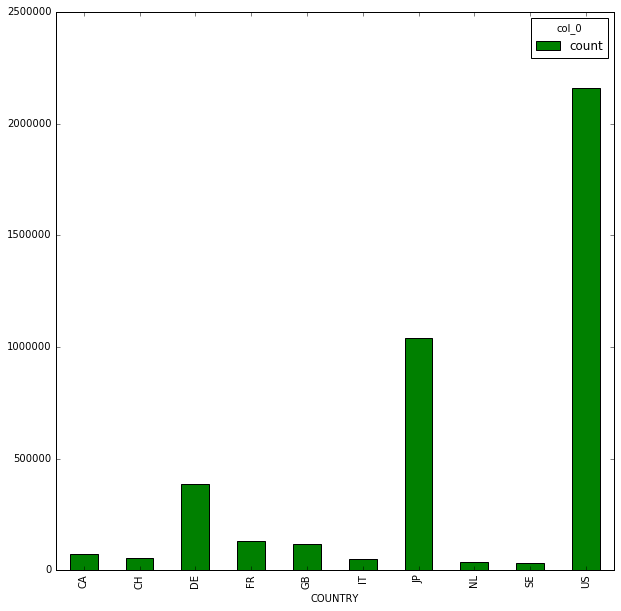

In [73]:

patent_country_greater_than_mean.plot(kind='bar', figsize=(10,10), color='green' )
